In [166]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-churn-dataset/customer_churn_dataset-testing-master.csv
/kaggle/input/customer-churn-dataset/customer_churn_dataset-training-master.csv


In [167]:
df=pd.read_csv("/kaggle/input/customer-churn-dataset/customer_churn_dataset-training-master.csv")

In [168]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [169]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [170]:
df.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [171]:
df=df.drop(["CustomerID","Age"],axis=1)

In [172]:
df=df.dropna()

In [173]:
df=pd.get_dummies(df,columns=["Subscription Type","Contract Length","Gender"],drop_first=True).astype(int)

In [174]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [175]:
X=df.drop(["Churn"],axis=1)
y=df["Churn"]

In [176]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=24)

In [179]:
scaler=StandardScaler()

In [180]:
X_train_scaled=scaler.fit_transform(X_train)
x_test=scaler.transform(X_test)

In [181]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [183]:
model=Sequential()

In [184]:
model.add(Dense(3,activation='sigmoid',input_dim=11))
model.add(Dense(1,activation='sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [185]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [187]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [188]:
history=model.fit(X_train_scaled,y_train,validation_split=0.2,epochs=10)

Epoch 1/10
8817/8817 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.8384 - loss: 0.3712 - val_accuracy: 0.9192 - val_loss: 0.2130
Epoch 2/10
8817/8817 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9216 - loss: 0.2053 - val_accuracy: 0.9322 - val_loss: 0.1853
Epoch 3/10
8817/8817 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9330 - loss: 0.1826 - val_accuracy: 0.9360 - val_loss: 0.1771
Epoch 4/10
8817/8817 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9366 - loss: 0.1761 - val_accuracy: 0.9393 - val_loss: 0.1723
Epoch 5/10
8817/8817 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9388 - loss: 0.1712 - val_accuracy: 0.9414 - val_loss: 0.1684
Epoch 6/10
8817/8817 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9411 - loss: 0.1680 - val_accuracy: 0.9440 - val_loss: 0.1647
Epoch 7/10
8817/8817 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9440 - loss: 0.1633 - val_accuracy: 0.9464 - val_loss: 0.1611
Epoch 8/10
8817/8817 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9457 - loss: 0

In [189]:
y_pred=model.predict(X_test).astype(int)

2756/2756 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [192]:
y_pred_probs = np.array(y_pred[0])
y_pred_binary = (y_pred_probs >= 0.6).astype(int)

In [193]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [194]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [195]:
print(accuracy_score(y_test,y_pred))

0.4350153685619336


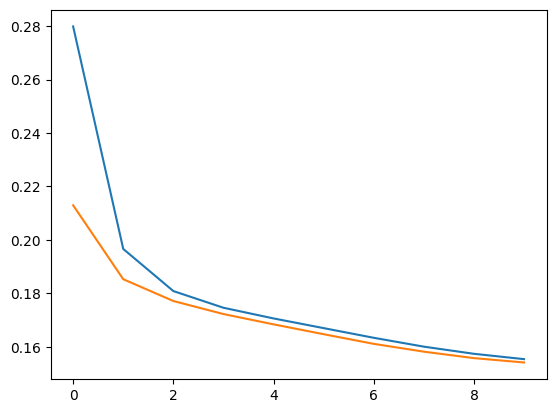

In [196]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])